In [45]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
from pretty_confusion_matrix import pp_matrix

In [29]:
def plot_confusion_matrix(name, cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, fold=0):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.0f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

    plt.savefig(name)

    plt.close()

In [7]:
X = []
y = []

classes = ["beach","bus","cafe_restaurant","car","city_center","forest_path","grocery_store","home","library","metro_station","office","park","residential_area","train","tram"]

arq = open("./features_LBP_janela.txt", "r")
for linha in arq:
    aux = linha.split("|")
    lbp_local = []
    for i in range(len(aux)-1):
        classe_local = []
        aux2 = aux[i].split(";")
        for j in aux2:
            classe_local.append(float(j))
        lbp_local.append(classe_local)
    X.append(lbp_local)
    y.append(aux[len(aux)-1].replace("\n", ""))
arq.close()

In [3]:
y_preds = []
svm_preds = []
best_model_svm, best_acc_svm = None, 0.0

k_fold = 5
# Split dos folds
kfold = KFold(n_splits=k_fold, shuffle=True)

# For para treinamento entre os folds
fold_no = 1
for train, test in kfold.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Treinamento para o fold {fold_no} ...')

    # Vetores para teste e treinamento
    x_train_svm = []
    y_train_svm = []

    x_test_svm = []
    y_test_svm = []

    # Fazendo o split dos dados para treinamento
    for i in train:
        for j in range(6):
            x_train_svm.append(X[i][j])
            y_train_svm.append(y[i])

    # Fazendo o split dos dados para teste
    for i in test:
        for j in range(6):
            x_test_svm.append(X[i][j])
            y_test_svm.append(y[i])


    y_pred = y_test_svm[:]
    for res in y_pred:
        y_preds.append(res)

    # SVM
    svm_model = SVC(C=100, kernel='poly', gamma='scale', probability=True)
    svm_model.fit(x_train_svm, y_train_svm)
    svm_predictions = svm_model.predict_proba(x_test_svm)

    svm_predictions = svm_model.predict(x_test_svm)
    acc_svm = accuracy_score(y_test_svm, svm_predictions)

    for i in svm_predictions:
        svm_preds.append(i)

    print(f'{acc_svm} para o fold {fold_no}')

    if acc_svm > best_acc_svm:
        best_acc_svm = acc_svm
        best_model_svm = svm_model

    fold_no += 1


------------------------------------------------------------------------
Treinamento para o fold 1 ...
0.6488603988603988 para o fold 1
------------------------------------------------------------------------
Treinamento para o fold 2 ...
0.6239316239316239 para o fold 2
------------------------------------------------------------------------
Treinamento para o fold 3 ...
0.6324786324786325 para o fold 3
------------------------------------------------------------------------
Treinamento para o fold 4 ...
0.6467236467236467 para o fold 4
------------------------------------------------------------------------
Treinamento para o fold 5 ...
0.6346153846153846 para o fold 5


In [50]:
svm_preds_classes = []
y_preds_classes = []

for i in range(len(svm_preds)):
    svm_preds_classes.append(classes[int(svm_preds[i])])
    y_preds_classes.append(classes[int(y_preds[i])])

matriz_confusao = confusion_matrix(y_preds, svm_preds)
relatorio_classificacao = classification_report(y_preds_classes, svm_preds_classes)

acc = accuracy_score(y_preds, svm_preds)
print(acc)

0.6373219373219373


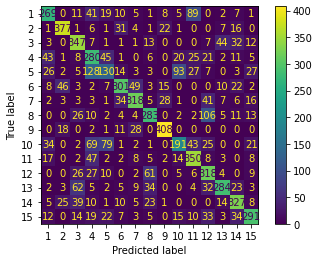

In [52]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=[i for i in range(1, 16)])

cm_display.plot()

plt.show()

In [22]:
print(relatorio_classificacao)

                  precision    recall  f1-score   support

           beach       0.64      0.57      0.60       468
             bus       0.79      0.81      0.80       468
 cafe_restaurant       0.64      0.60      0.62       468
             car       0.84      0.87      0.86       468
     city_center       0.55      0.41      0.47       468
     forest_path       0.63      0.75      0.68       468
   grocery_store       0.53      0.68      0.60       468
            home       0.74      0.61      0.67       468
         library       0.66      0.70      0.68       468
   metro_station       0.70      0.62      0.66       468
          office       0.63      0.74      0.68       468
            park       0.43      0.60      0.50       468
residential_area       0.40      0.28      0.33       468
           train       0.70      0.64      0.67       468
            tram       0.72      0.68      0.70       468

        accuracy                           0.64      7020
       macro